## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

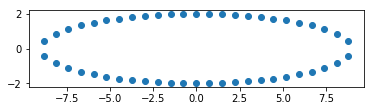

In [3]:
a = 2
b_ = 9
n = 50

phi = angles_in_ellipse(n, a, b_)
e = (1.0 - a ** 2.0 / b_ ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b_ * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
 sp.special.ellipeinc(phi, e)

array([0.        , 0.08275153, 0.16550306, 0.24825458, 0.33100611,
       0.41375764, 0.49650917, 0.57926069, 0.66201222, 0.74476375,
       0.82751528, 0.9102668 , 0.99301833, 1.07576986, 1.15852139,
       1.24127291, 1.32402444, 1.40677597, 1.4895275 , 1.57227903,
       1.65503055, 1.73778208, 1.82053361, 1.90328514, 1.98603666,
       2.06878819, 2.15153972, 2.23429125, 2.31704277, 2.3997943 ,
       2.48254583, 2.56529736, 2.64804888, 2.73080041, 2.81355194,
       2.89630347, 2.979055  , 3.06180652, 3.14455805, 3.22730958,
       3.31006111, 3.39281263, 3.47556416, 3.55831569, 3.64106722,
       3.72381874, 3.80657027, 3.8893218 , 3.97207333, 4.05482486])

In [7]:
X= b_ * np.sin(phi)
Y= a * np.cos(phi)

In [8]:
mi=np.min(X)
mi

-8.800037228631153

In [9]:
ma=np.max(X)
ma

8.800037228631037

In [10]:
np.max(Y)

2.0

In [11]:
np.min(Y)

-2.0

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) <img src='https://i.imgur.com/FctjBiD.png'> in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model again on the updated data. 

8. you should plot a 3*5 grid of subplots, where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION (please do search for it).
</i>
</font>
</pre>

In [13]:
def draw_line(coef,intercept, mi, ma,a,b):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # min=0 and max=1
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[ mi,((coef*mi + intercept))],[ ma,((coef*ma + intercept))]])
    plt.plot(points[:,0], points[:,1],color=a)
    plt.title(b)

# <center> SKLearn Implementation 

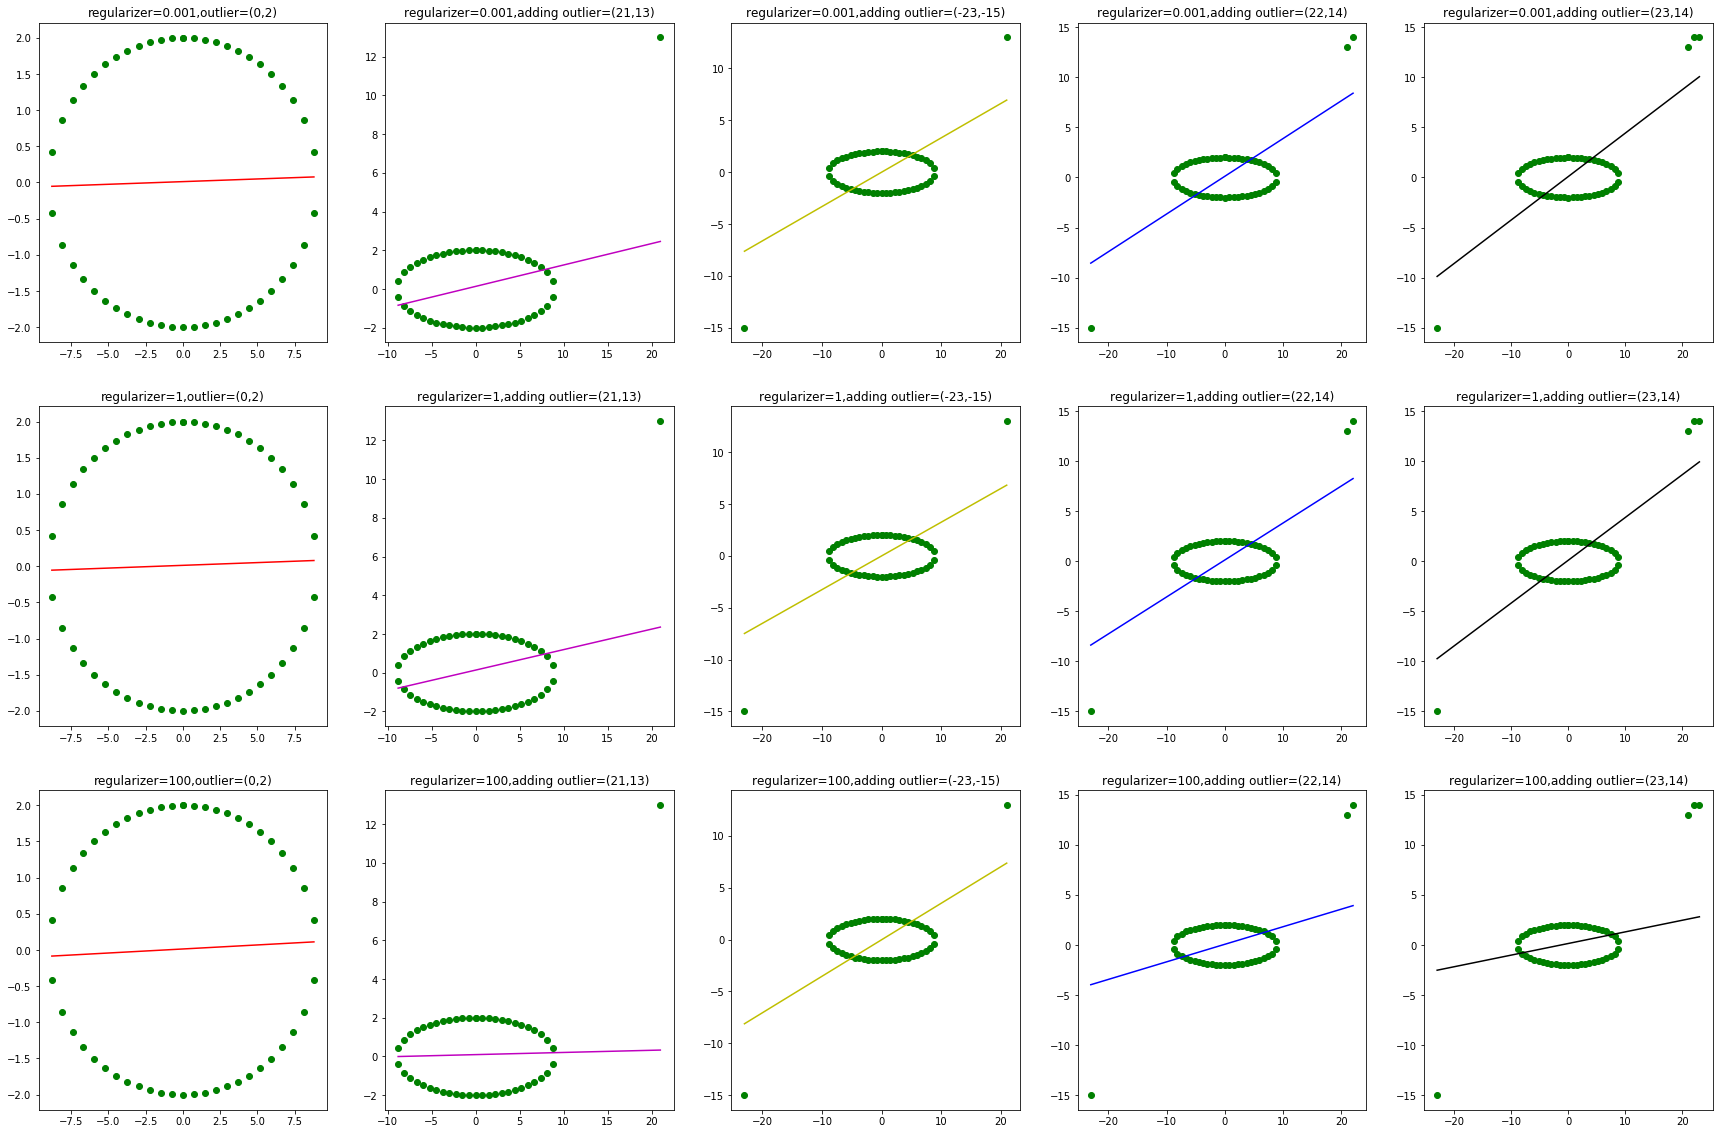

In [39]:
regularizer=[0.001,1,100]
outlier=[(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
a=2
c=0

colors=['r','m','y','b','k','r','m','y','b','k','r','m','y','b','k']
title=['regularizer=0.001,outlier=(0,2)','regularizer=0.001,adding outlier=(21,13)','regularizer=0.001,adding outlier=(-23,-15)',
      'regularizer=0.001,adding outlier=(22,14)','regularizer=0.001,adding outlier=(23,14)','regularizer=1,outlier=(0,2)',
      'regularizer=1,adding outlier=(21,13)','regularizer=1,adding outlier=(-23,-15)','regularizer=1,adding outlier=(22,14)',
      'regularizer=1,adding outlier=(23,14)','regularizer=100,outlier=(0,2)','regularizer=100,adding outlier=(21,13)',
      'regularizer=100,adding outlier=(-23,-15)','regularizer=100,adding outlier=(22,14)','regularizer=100,adding outlier=(23,14)']
plt.figure(figsize=(30,20))
fig.tight_layout()
for i in (regularizer):
    X= b_ * np.sin(phi)
    Y= a * np.cos(phi)
    for idx,o in enumerate(outlier):
        X=np.append(X,o[0]).reshape(-1,1)
        Y=np.append(Y,o[1]).reshape(-1,1)
        mi=min(X)
        ma=max(X)
        
        clf = SGDRegressor(eta0=0.001, alpha=i, loss='squared_loss', random_state=15, penalty='l2', 
                                         tol=1e-10, learning_rate='constant')
        clf.fit(X,Y)
        
        y_pred=clf.predict(X)
        y_pred=clf.coef_*X+clf.intercept_
        plt.subplot(3, 5, c+1)
        plt.scatter(X,Y,color='green')
        draw_line(clf.coef_,clf.intercept_, mi, ma,colors[c],title[c])
        c+=1
plt.show()
        

In [313]:
 print('=='*55)

# <center> Observation

# The hyperplane movement is highly towards the direction of outliers,as we see in the plots.
# The increase in regularizer from 0.01 to 1 and 100 also moves the hyperplane towars the outliers.
# The best fit linear regression happens when we have  "close outliers ", as the outliers are far away from the cluster,they give bad impact on  the best fit linear model 

# So, we need to find the outliers and remove them before training our model or apply (RANSAC)